# GridSearchCV - Lab

## Introduction

In this lab, we'll explore how to use scikit-learn's `GridSearchCV` class to exhaustively search through every combination of hyperparameters until we find optimal values for a given model.

## Objectives

In this lab you will:

- Design a parameter grid for use with scikit-learn's GridSearchCV 
- Use GridSearchCV to increase model performance through parameter tuning 


## The dataset

For this lab, we'll be working with the [Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/wine+quality) from the UCI Machine Learning dataset repository. We'll be using data about the various features of wine to predict the quality of the wine on a scale from 1-10 stars, making this a multiclass classification problem.  

### Getting started

Before we can begin grid searching our way to optimal hyperparameters, we'll need to go through the basic steps of modeling. This means that we'll need to:

* Import and inspect the dataset (and clean, if necessary)
* Split the data into training and test sets
* Build and fit a baseline model that we can compare against our grid search results 

Run the cell below to import everything we'll need for this lab:   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

Now that we've imported all the necessary libraries and functions for this lab, we'll need to get the dataset.  

Our data is stored in the file `'winequality-red.csv'`. Use Pandas to import the data from this file and store it in a DataFrame.  Print the head to ensure that everything loaded correctly. 

In [2]:
# Import the data
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Great! Let's inspect our data. In the cell below, perform some basic exploratory data analysis on our dataset. Get a feel for your data by exploring the descriptive statistics and creating at least one visualization to help you better understand this dataset.

In [6]:
import my_functions as mf

In [3]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# The data is all numeric and has no missing values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
plt.style.use('ggplot')
from jupyterthemes import jtplot
jtplot.style()

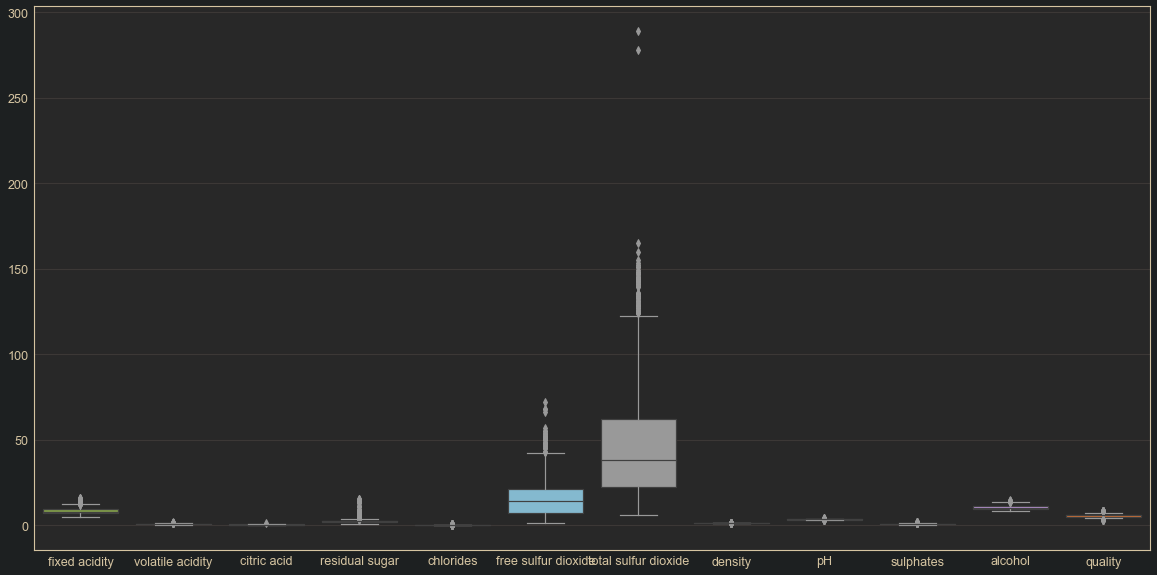

In [42]:
plt.figure(figsize=(20,10))
edgecolor = ('#999999')
sns.boxplot(data=df, whiskerprops={'color': edgecolor}, capprops={'color': edgecolor},
            flierprops={'markerfacecolor': edgecolor, 'markeredgecolor': edgecolor}
           );

Variable: fixed acidity
Normality Test Results for ['fixed acidity']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 fixed acidity 
 Statistic 
 0.999998 
 9.420307e-01 
 
 
 p-value 
 0.000000 
 1.525595e-24 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 fixed acidity 
 28.142958 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 fixed acidity 
 
 
 
 
 Statistic 
 3.412037e+02 
 
 
 p-value 
 8.101212e-75 
 
 
 Skew 
 9.818293e-01 
 
 
 Kurtosis 
 4.124856e+00

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

Skew: 0.9818292953262073
Kurtosis: 1.1248563352037486


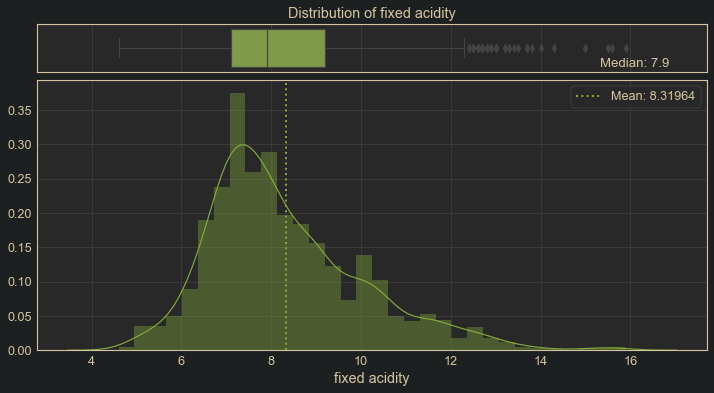

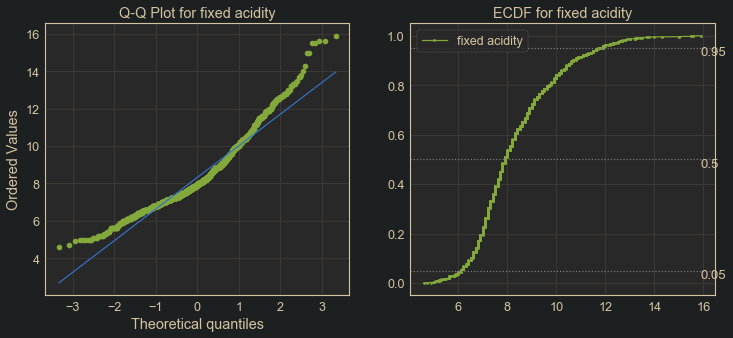

Variable: volatile acidity
Normality Test Results for ['volatile acidity']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 volatile acidity 
 Statistic 
 0.571695 
 9.743341e-01 
 
 
 p-value 
 0.000000 
 2.686807e-16 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 volatile acidity 
 5.683075 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 volatile acidity 
 
 
 
 
 Statistic 
 2.188096e+02 
 
 
 p-value 
 3.062627e-48 
 
 
 Skew 
 6.709624e-01 
 
 
 Kurtosis 
 4.217963e+00

count    1599.000000
mean        0.527821
std         0.179060
min         0.120000
25%         0.390000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

Skew: 0.6709623963499574
Kurtosis: 1.2179633893005306


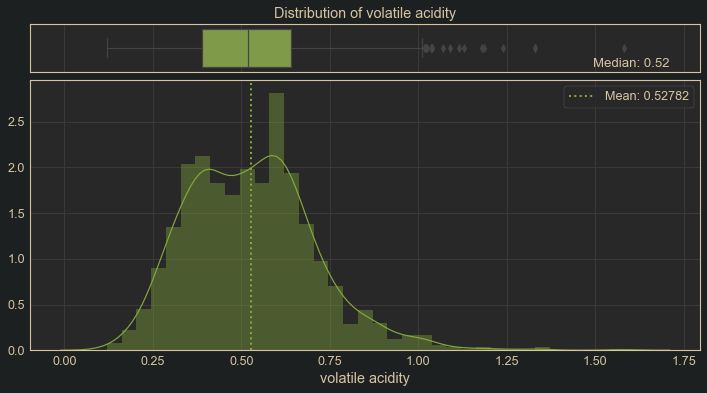

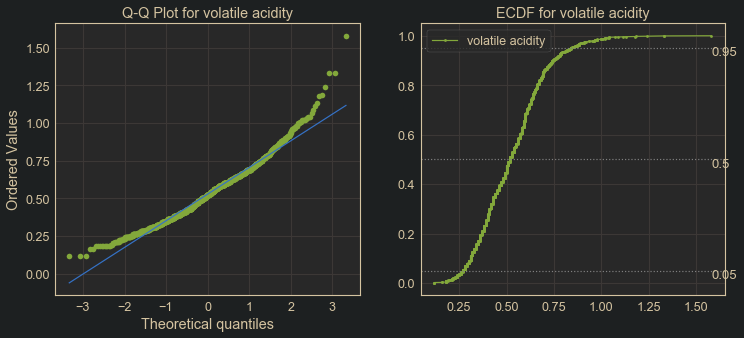

Variable: citric acid
Normality Test Results for ['citric acid']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 citric acid 
 Statistic 
 0.5 
 9.552900e-01 
 
 
 p-value 
 0.0 
 1.020820e-21 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 citric acid 
 17.542087 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 citric acid 
 
 
 
 
 Statistic 
 6.856649e+01 
 
 
 p-value 
 1.291145e-15 
 
 
 Skew 
 3.180386e-01 
 
 
 Kurtosis 
 2.209717e+00

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

Skew: 0.3180385895475358
Kurtosis: -0.7902825153036646


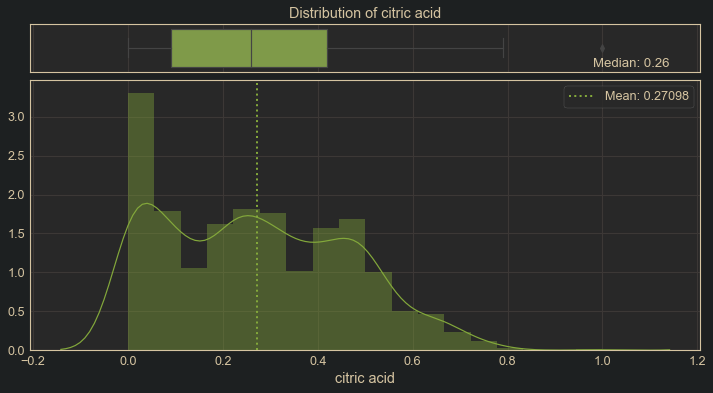

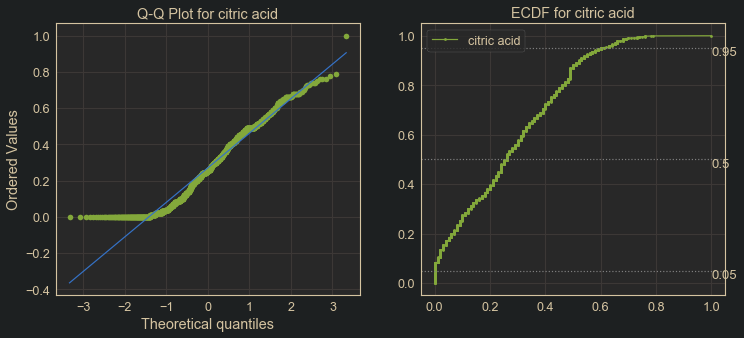

Variable: residual sugar
Normality Test Results for ['residual sugar']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residual sugar 
 Statistic 
 0.909862 
 0.566077 
 
 
 p-value 
 0.000000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residual sugar 
 188.064449 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 residual sugar 
 
 
 
 
 Statistic 
 59693.272633 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 4.536395 
 
 
 Kurtosis 
 31.524438

count    1599.000000
mean        2.538806
std         1.409928
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

Skew: 4.536394788805638
Kurtosis: 28.524437824252235


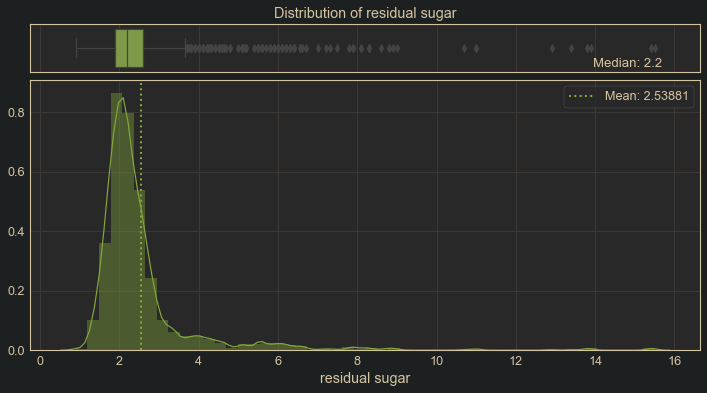

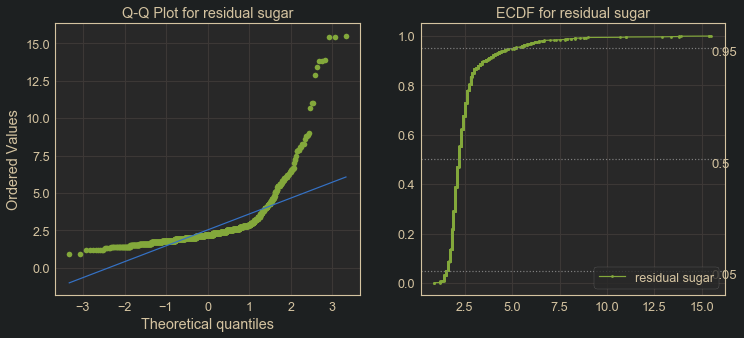

Variable: chlorides
Normality Test Results for ['chlorides']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 chlorides 
 Statistic 
 0.51328 
 0.484247 
 
 
 p-value 
 0.00000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 chlorides 
 210.449187 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 chlorides 
 
 
 
 
 Statistic 
 123780.035375 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 5.675017 
 
 
 Kurtosis 
 44.581708

count    1599.000000
mean        0.087467
std         0.047065
min         0.012000
25%         0.070000
50%         0.079000
75%         0.090000
max         0.611000
Name: chlorides, dtype: float64

Skew: 5.675016527504259
Kurtosis: 41.581708043675775


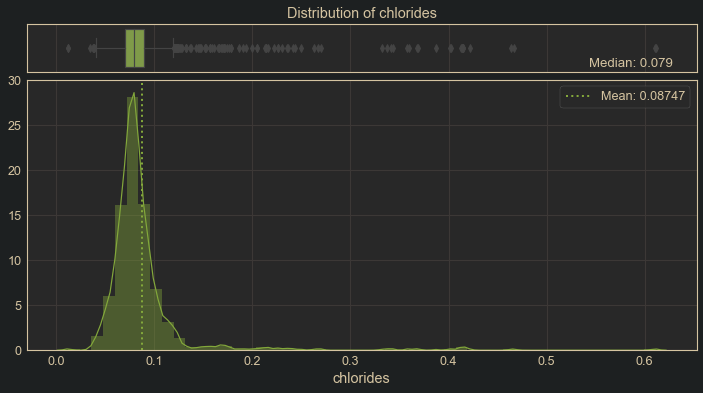

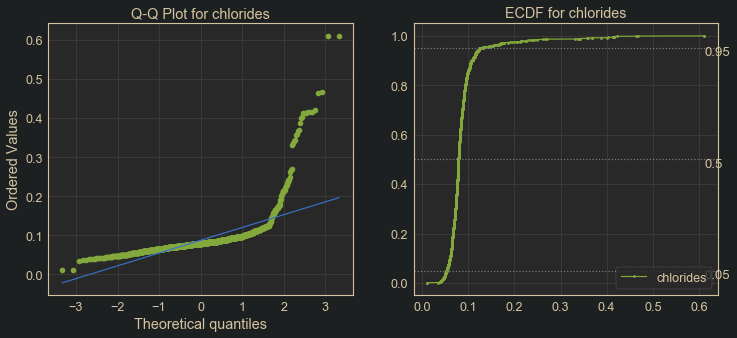

Variable: free sulfur dioxide
Normality Test Results for ['free sulfur dioxide']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 free sulfur dioxide 
 Statistic 
 0.996149 
 9.018407e-01 
 
 
 p-value 
 0.000000 
 7.697398e-31 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 free sulfur dioxide 
 38.60991 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 free sulfur dioxide 
 
 
 
 
 Statistic 
 6.861097e+02 
 
 
 p-value 
 1.030790e-149 
 
 
 Skew 
 1.249394e+00 
 
 
 Kurtosis 
 5.013490e+00

count    1599.000000
mean       15.874922
std        10.460157
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        72.000000
Name: free sulfur dioxide, dtype: float64

Skew: 1.249393847434253
Kurtosis: 2.01348999733378


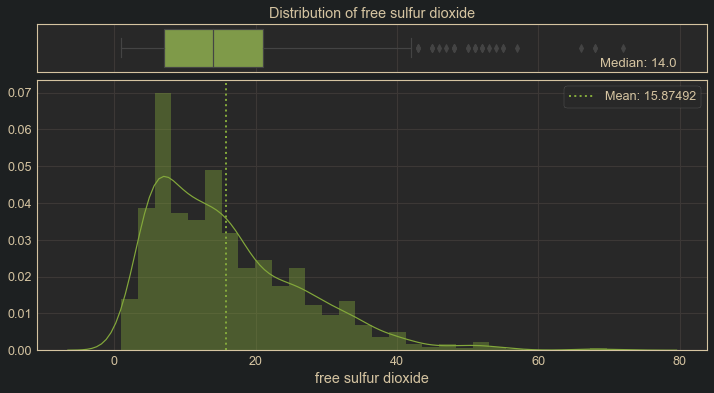

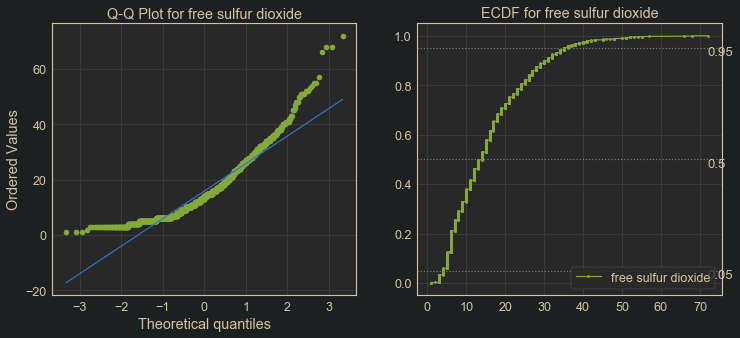

Variable: total sulfur dioxide
Normality Test Results for ['total sulfur dioxide']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 total sulfur dioxide 
 Statistic 
 1.0 
 8.732254e-01 
 
 
 p-value 
 0.0 
 3.574144e-34 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 total sulfur dioxide 
 52.488651 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 total sulfur dioxide 
 
 
 
 
 Statistic 
 1570.074485 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 1.514109 
 
 
 Kurtosis 
 6.794172

count    1599.000000
mean       46.467792
std        32.895324
min         6.000000
25%        22.000000
50%        38.000000
75%        62.000000
max       289.000000
Name: total sulfur dioxide, dtype: float64

Skew: 1.5141091878506638
Kurtosis: 3.7941717664905665


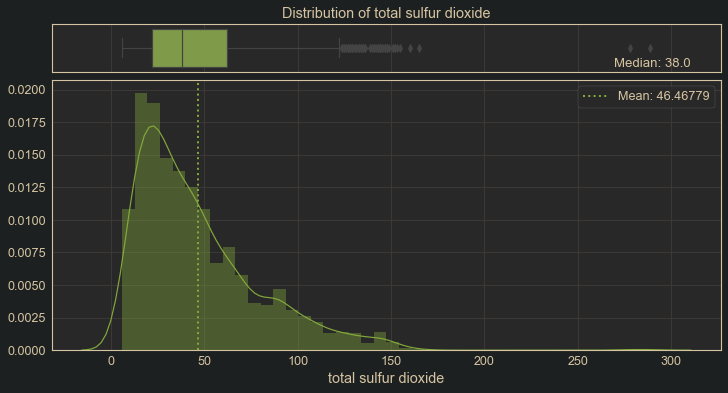

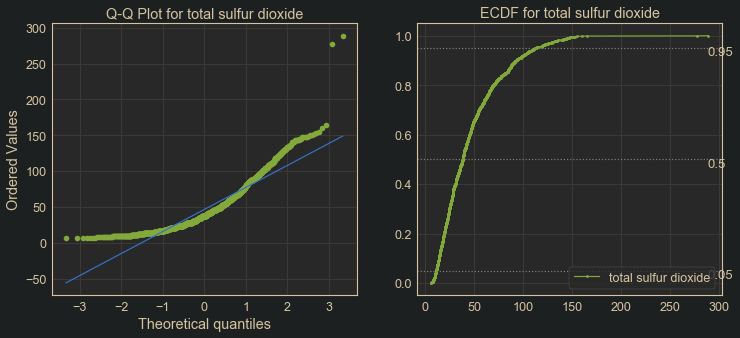

Variable: density
Normality Test Results for ['density']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 density 
 Statistic 
 0.83893 
 9.908668e-01 
 
 
 p-value 
 0.00000 
 1.940096e-08 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 density 
 3.867595 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 density 
 
 
 
 
 Statistic 
 5.865534e+01 
 
 
 p-value 
 1.832965e-13 
 
 
 Skew 
 7.122077e-02 
 
 
 Kurtosis 
 3.927411e+00

count    1599.000000
mean        0.996747
std         0.001887
min         0.990070
25%         0.995600
50%         0.996750
75%         0.997835
max         1.003690
Name: density, dtype: float64

Skew: 0.07122077153539946
Kurtosis: 0.9274107990478333


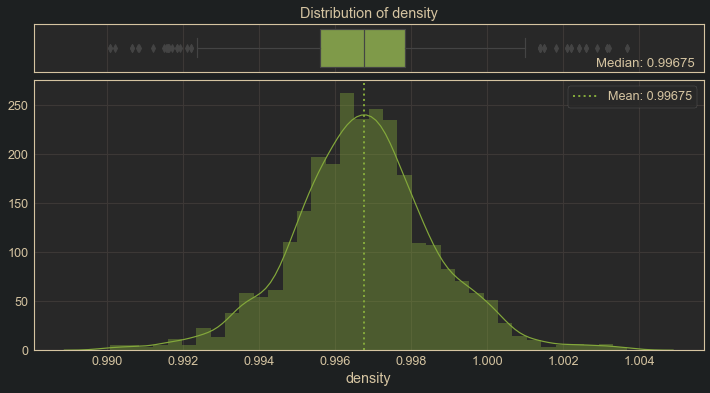

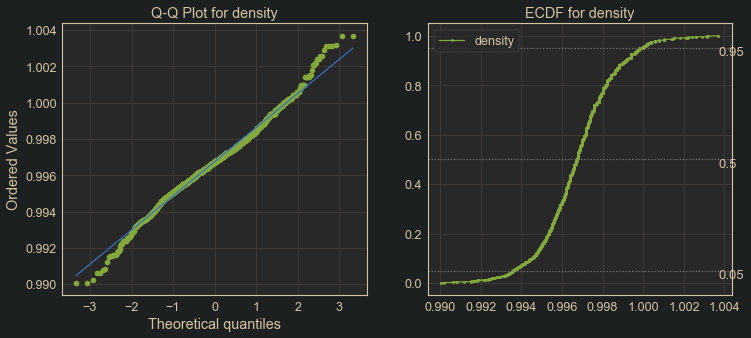

Variable: pH
Normality Test Results for ['pH']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 pH 
 Statistic 
 0.997256 
 0.993487 
 
 
 p-value 
 0.000000 
 0.000002 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 pH 
 1.864112 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 pH 
 
 
 
 
 Statistic 
 5.269015e+01 
 
 
 p-value 
 3.618095e-12 
 
 
 Skew 
 1.935018e-01 
 
 
 Kurtosis 
 3.800671e+00

count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

Skew: 0.19350175891005525
Kurtosis: 0.8006714441211544


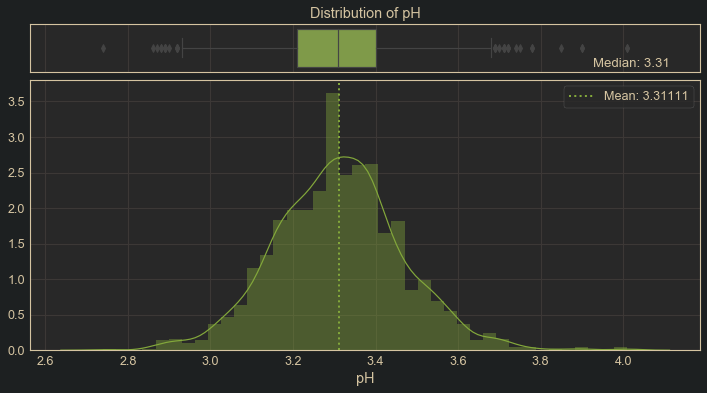

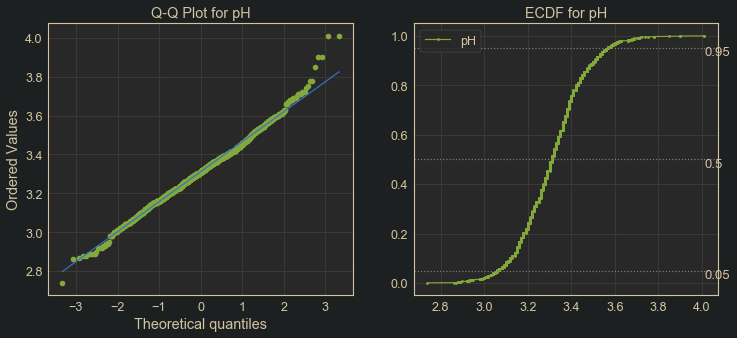

Variable: sulphates
Normality Test Results for ['sulphates']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 sulphates 
 Statistic 
 0.655145 
 8.330425e-01 
 
 
 p-value 
 0.000000 
 5.821618e-38 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 sulphates 
 46.932195 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 sulphates 
 
 
 
 
 Statistic 
 10657.950193 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 2.426393 
 
 
 Kurtosis 
 14.679884

count    1599.000000
mean        0.658149
std         0.169507
min         0.330000
25%         0.550000
50%         0.620000
75%         0.730000
max         2.000000
Name: sulphates, dtype: float64

Skew: 2.426393455449087
Kurtosis: 11.6798841115311


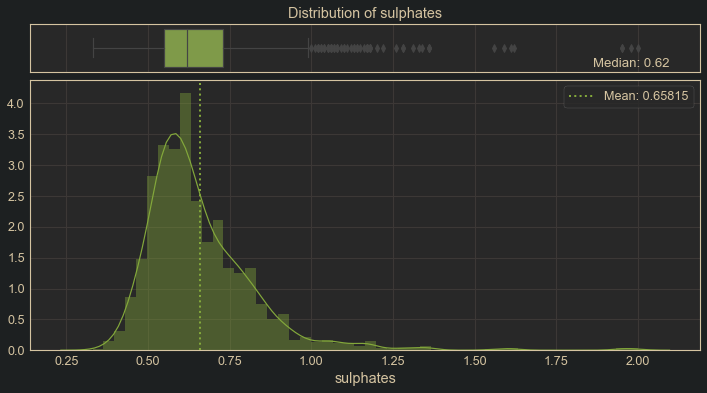

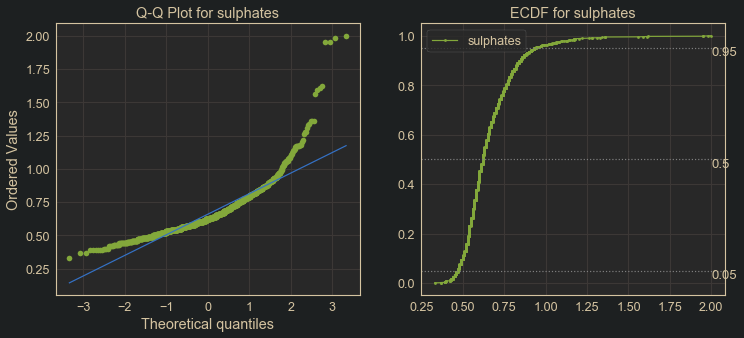

Variable: alcohol
Normality Test Results for ['alcohol']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 alcohol 
 Statistic 
 1.0 
 9.288390e-01 
 
 
 p-value 
 0.0 
 6.643665e-27 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 alcohol 
 34.917064 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 alcohol 
 
 
 
 
 Statistic 
 1.996635e+02 
 
 
 p-value 
 4.401708e-44 
 
 
 Skew 
 8.600211e-01 
 
 
 Kurtosis 
 3.195654e+00

count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64

Skew: 0.8600210646566755
Kurtosis: 0.1956543762123122


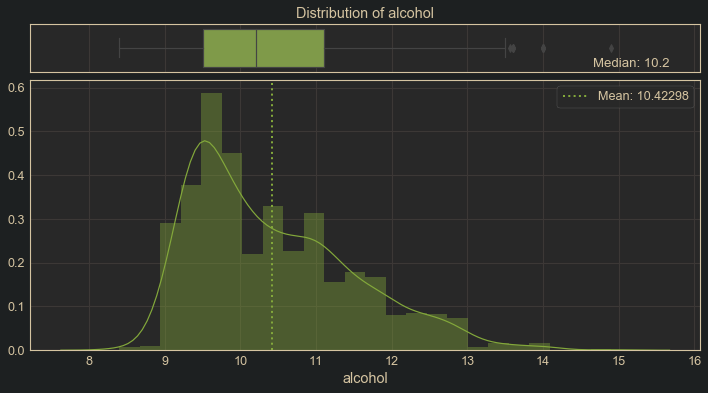

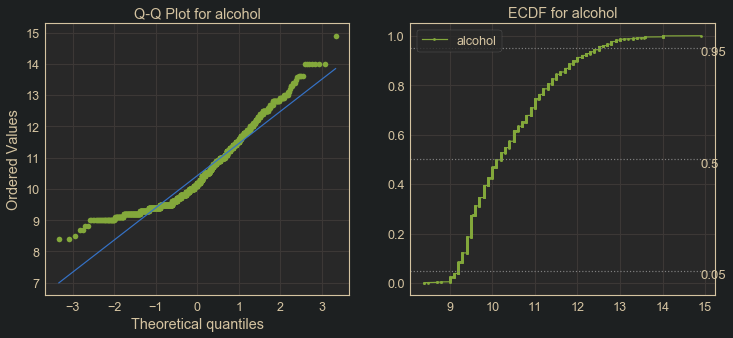

Variable: quality
Normality Test Results for ['quality']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 quality 
 Statistic 
 0.99865 
 8.575844e-01 
 
 
 p-value 
 0.00000 
 9.504004e-36 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 quality 
 110.632768 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 quality 
 
 
 
 
 Statistic 
 18.300313 
 
 
 p-value 
 0.000106 
 
 
 Skew 
 0.217597 
 
 
 Kurtosis 
 3.292031

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

Skew: 0.21759720553467285
Kurtosis: 0.2920311389729804


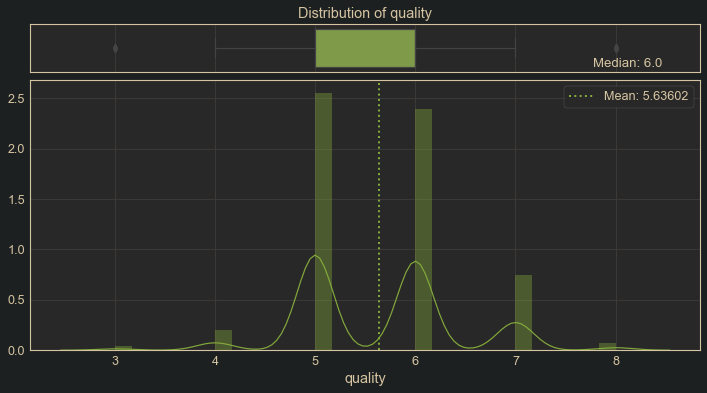

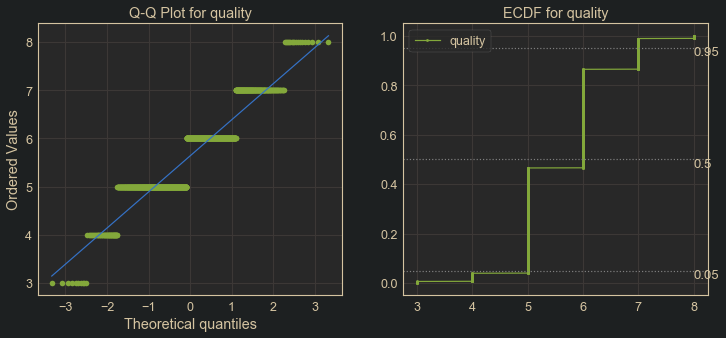

In [9]:
# The features are on different scales, let's look at their distributions
mf.visualize_distribution(df, df.columns)

**_Question:_** Based on your findings during your exploratory data analysis, do you think that we need to do any sort of preprocessing on this dataset? Why or why not?

Write your answer below this line:
________________________________________________________________________________________________________________________________
<br>
There are many distributions with positive skew, and some with large outliers, meaning they could possibly benefit from log transformations. The density column is already fairly normal, but has excess kurtosis due to outliers on each side.


### Preprocessing our data

Now, we'll perform any necessary preprocessing on our dataset before training our model. We'll start by isolating the target variable that we are trying to predict.  

In the cell below: 
* Assign the data in the `quality` column to the `y` variable 
* Drop the `quality` column from the dataset and assign it to `X` 

In [11]:
y = df.quality
X = df.drop(columns=['quality'])
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Variable: fixed acidity
Normality Test Results for ['fixed acidity']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 fixed acidity 
 Statistic 
 0.961538 
 9.819350e-01 
 
 
 p-value 
 0.000000 
 2.660732e-13 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 fixed acidity 
 11.074521 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 fixed acidity 
 
 
 
 
 Statistic 
 5.647414e+01 
 
 
 p-value 
 5.455010e-13 
 
 
 Skew 
 4.553151e-01 
 
 
 Kurtosis 
 3.135626e+00

count    1599.000000
mean        2.215842
std         0.178100
min         1.722767
25%         2.091864
50%         2.186051
75%         2.322388
max         2.827314
Name: fixed acidity, dtype: float64

Skew: 0.4553151244347121
Kurtosis: 0.13562624497980158


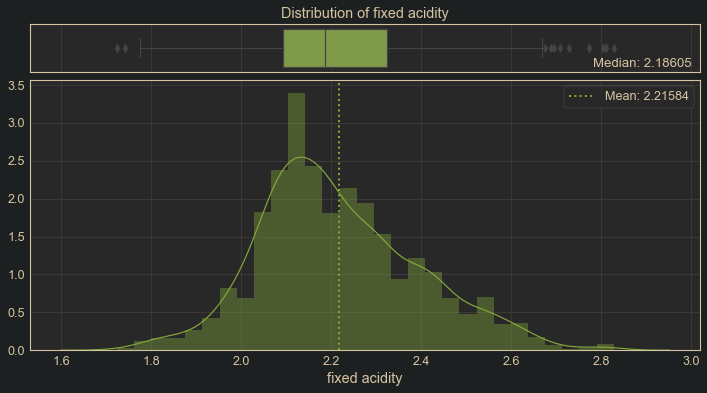

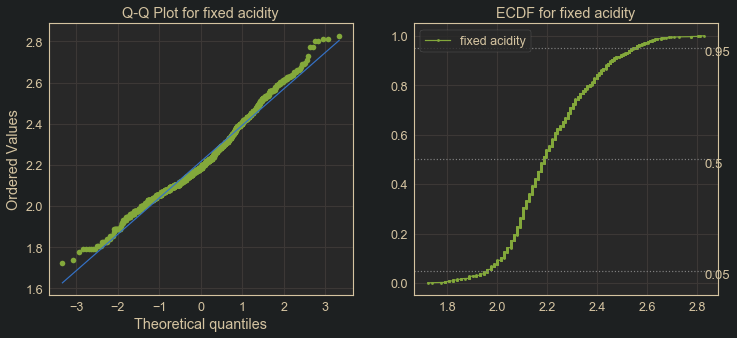

Variable: volatile acidity
Normality Test Results for ['volatile acidity']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 volatile acidity 
 Statistic 
 0.563081 
 9.922560e-01 
 
 
 p-value 
 0.000000 
 1.887099e-07 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 volatile acidity 
 2.45103 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 volatile acidity 
 
 
 
 
 Statistic 
 21.560995 
 
 
 p-value 
 0.000021 
 
 
 Skew 
 0.269914 
 
 
 Kurtosis 
 3.179449

count    1599.000000
mean        0.417173
std         0.114926
min         0.113329
25%         0.329304
50%         0.418710
75%         0.494696
max         0.947789
Name: volatile acidity, dtype: float64

Skew: 0.26991439135227796
Kurtosis: 0.17944933587099898


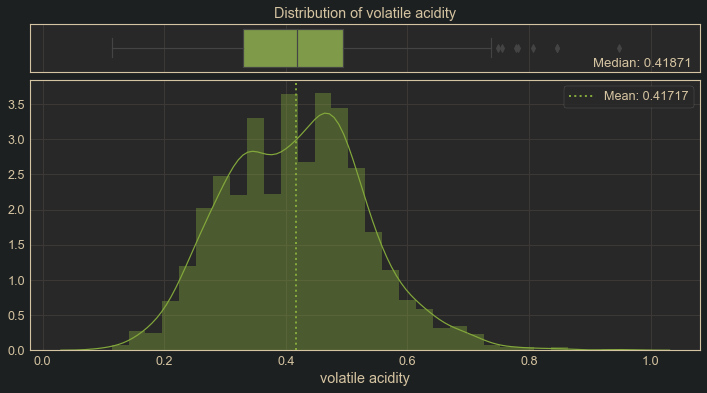

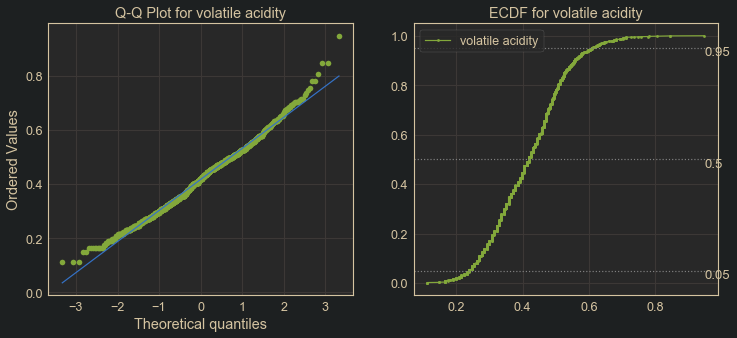

Variable: citric acid
Normality Test Results for ['citric acid']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 citric acid 
 Statistic 
 0.5 
 9.574443e-01 
 
 
 p-value 
 0.0 
 3.352075e-21 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 citric acid 
 17.290026 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 citric acid 
 
 
 
 
 Statistic 
 7.387565e+01 
 
 
 p-value 
 9.080444e-17 
 
 
 Skew 
 8.742383e-02 
 
 
 Kurtosis 
 1.961609e+00

count    1599.000000
mean        0.228147
std         0.152423
min         0.000000
25%         0.086178
50%         0.231112
75%         0.350657
max         0.693147
Name: citric acid, dtype: float64

Skew: 0.08742383288809187
Kurtosis: -1.038391070337351


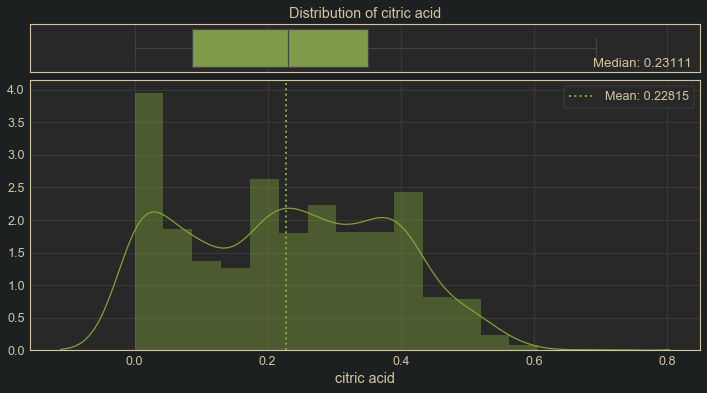

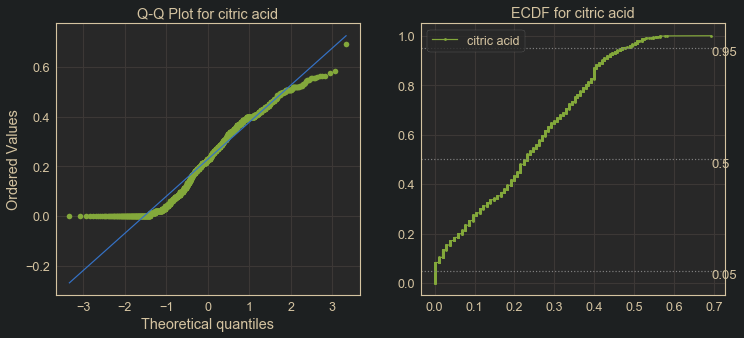

Variable: residual sugar
Normality Test Results for ['residual sugar']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 residual sugar 
 Statistic 
 0.79996 
 8.004441e-01 
 
 
 p-value 
 0.00000 
 1.584841e-40 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 residual sugar 
 85.548383 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 residual sugar 
 
 
 
 
 Statistic 
 4759.291252 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 2.252960 
 
 
 Kurtosis 
 10.150573

count    1599.000000
mean        1.218131
std         0.269969
min         0.641854
25%         1.064711
50%         1.163151
75%         1.280934
max         2.803360
Name: residual sugar, dtype: float64

Skew: 2.2529604508916767
Kurtosis: 7.1505728344873525


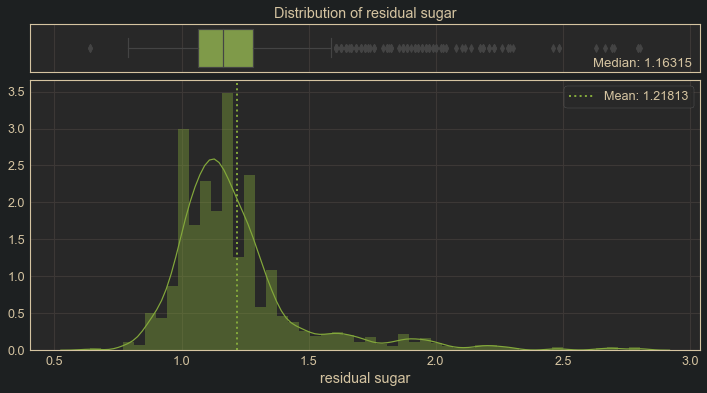

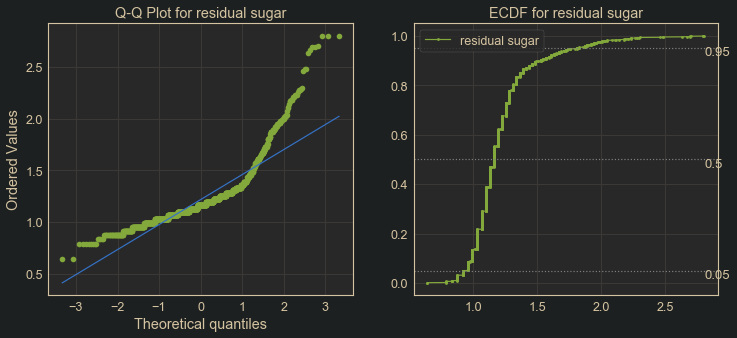

Variable: chlorides
Normality Test Results for ['chlorides']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 chlorides 
 Statistic 
 0.512999 
 0.534455 
 
 
 p-value 
 0.000000 
 0.000000 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 chlorides 
 183.992718 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 chlorides 
 
 
 
 
 Statistic 
 81632.065047 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 5.066718 
 
 
 Kurtosis 
 36.504630

count    1599.000000
mean        0.083038
std         0.038991
min         0.011929
25%         0.067659
50%         0.076035
75%         0.086178
max         0.476855
Name: chlorides, dtype: float64

Skew: 5.066717661268882
Kurtosis: 33.504630179817646


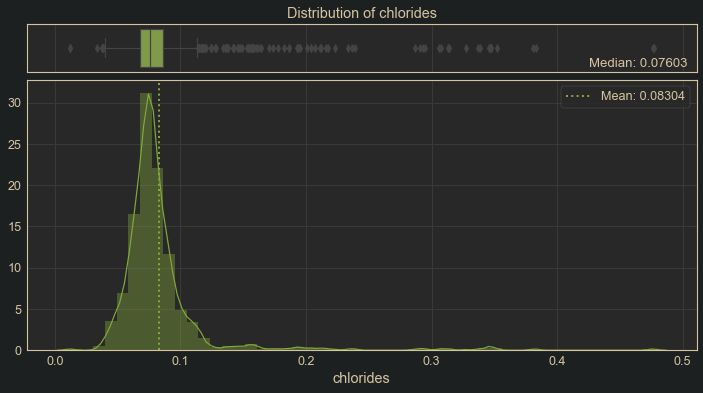

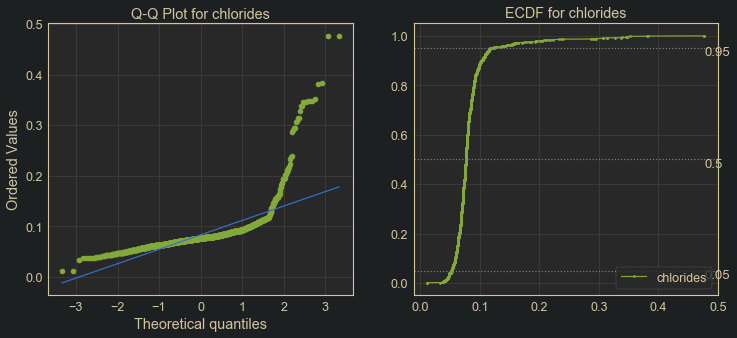

Variable: free sulfur dioxide
Normality Test Results for ['free sulfur dioxide']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 free sulfur dioxide 
 Statistic 
 0.91467 
 9.851816e-01 
 
 
 p-value 
 0.00000 
 9.271073e-12 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 free sulfur dioxide 
 7.506116 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 free sulfur dioxide 
 
 
 
 
 Statistic 
 3.187618e+01 
 
 
 p-value 
 1.197224e-07 
 
 
 Skew 
 -9.730748e-02 
 
 
 Kurtosis 
 2.336248e+00

count    1599.000000
mean        2.639013
std         0.623790
min         0.693147
25%         2.079442
50%         2.708050
75%         3.091042
max         4.290459
Name: free sulfur dioxide, dtype: float64

Skew: -0.09730747681427822
Kurtosis: -0.6637520191594279


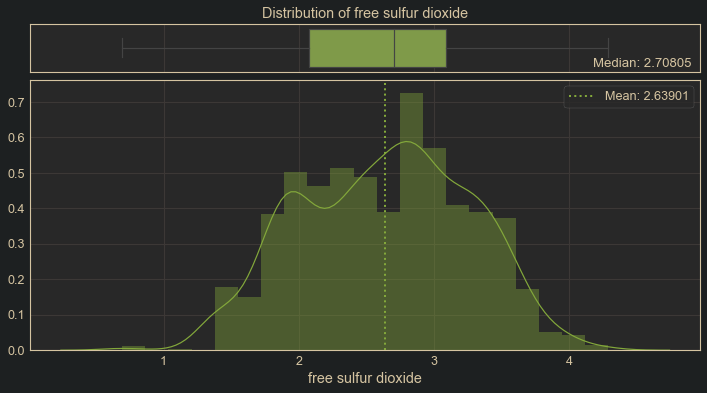

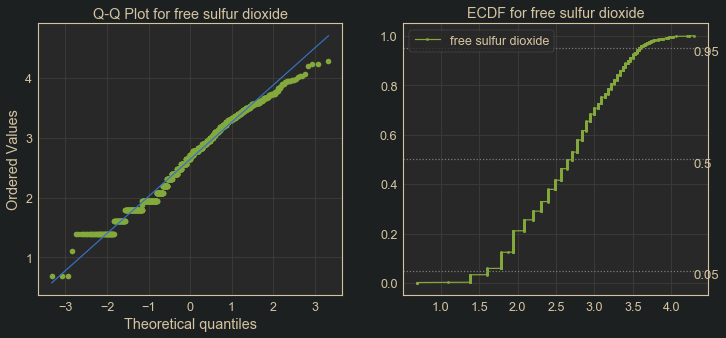

Variable: total sulfur dioxide
Normality Test Results for ['total sulfur dioxide']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 total sulfur dioxide 
 Statistic 
 0.98162 
 9.896605e-01 
 
 
 p-value 
 0.00000 
 3.138956e-09 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 total sulfur dioxide 
 3.451418 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 total sulfur dioxide 
 
 
 
 
 Statistic 
 3.214900e+01 
 
 
 p-value 
 1.044558e-07 
 
 
 Skew 
 -3.571230e-02 
 
 
 Kurtosis 
 2.309033e+00

count    1599.000000
mean        3.634750
std         0.682575
min         1.945910
25%         3.135494
50%         3.663562
75%         4.143135
max         5.669881
Name: total sulfur dioxide, dtype: float64

Skew: -0.03571229890293996
Kurtosis: -0.6909668379281841


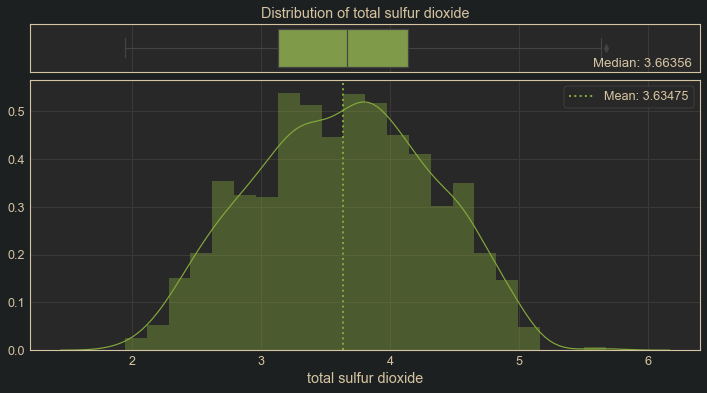

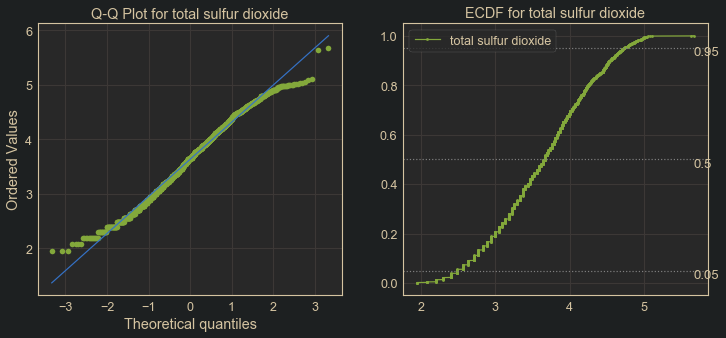

Variable: density
Normality Test Results for ['density']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 density 
 Statistic 
 0.754327 
 9.908931e-01 
 
 
 p-value 
 0.000000 
 2.021478e-08 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 density 
 3.858242 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 density 
 
 
 
 
 Statistic 
 5.839804e+01 
 
 
 p-value 
 2.084618e-13 
 
 
 Skew 
 6.707912e-02 
 
 
 Kurtosis 
 3.926564e+00

count    1599.000000
mean        0.691519
std         0.000945
min         0.688170
25%         0.690945
50%         0.691521
75%         0.692064
max         0.694990
Name: density, dtype: float64

Skew: 0.06707912058376929
Kurtosis: 0.9265635484024033


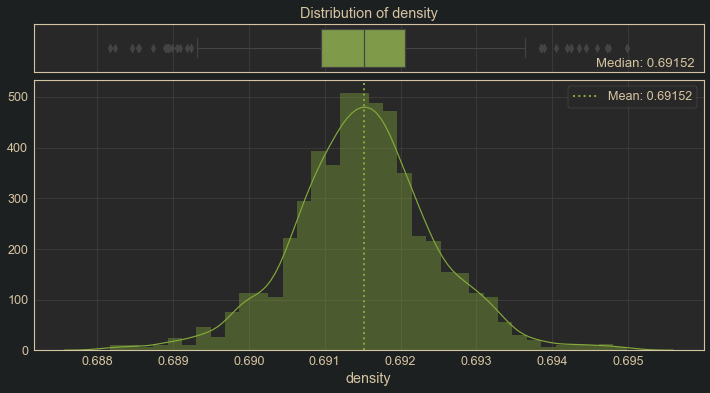

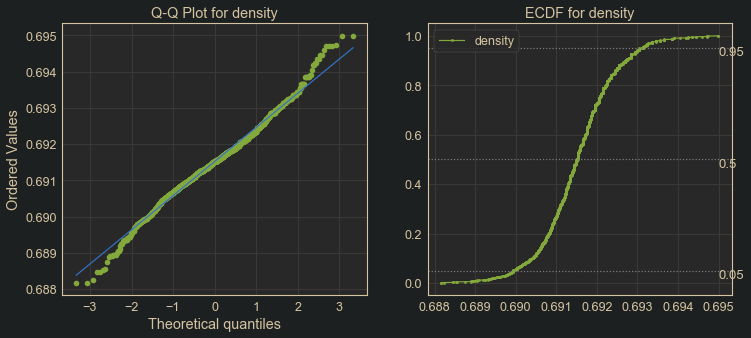

Variable: pH
Normality Test Results for ['pH']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 pH 
 Statistic 
 0.910974 
 0.995205 
 
 
 p-value 
 0.000000 
 0.000054 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 pH 
 1.632022 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 pH 
 
 
 
 
 Statistic 
 3.146398e+01 
 
 
 p-value 
 1.471238e-07 
 
 
 Skew 
 4.828558e-02 
 
 
 Kurtosis 
 3.680389e+00

count    1599.000000
mean        1.460557
std         0.035760
min         1.319086
25%         1.437463
50%         1.460938
75%         1.481605
max         1.611436
Name: pH, dtype: float64

Skew: 0.0482855760192081
Kurtosis: 0.6803887934518476


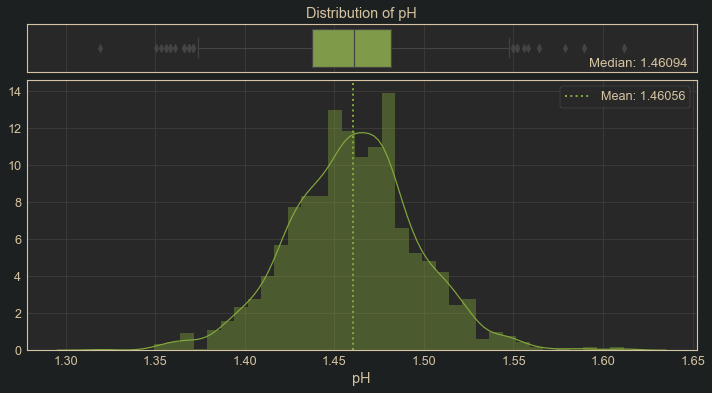

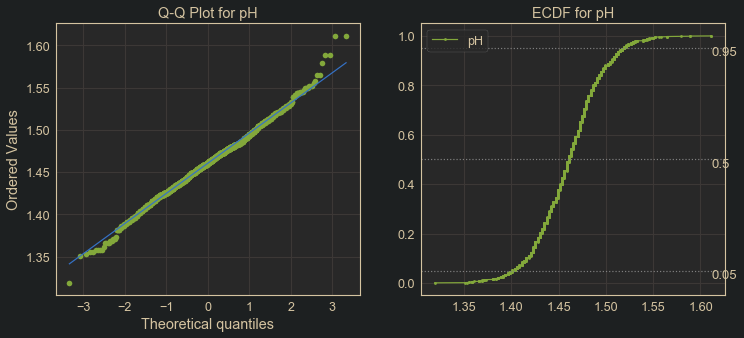

Variable: sulphates
Normality Test Results for ['sulphates']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 sulphates 
 Statistic 
 0.628947 
 9.023502e-01 
 
 
 p-value 
 0.000000 
 8.959381e-31 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 sulphates 
 28.696616 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 sulphates 
 
 
 
 
 Statistic 
 2602.403569 
 
 
 p-value 
 0.000000 
 
 
 Skew 
 1.608986 
 
 
 Kurtosis 
 8.357716

count    1599.000000
mean        0.501073
std         0.093731
min         0.285179
25%         0.438255
50%         0.482426
75%         0.548121
max         1.098612
Name: sulphates, dtype: float64

Skew: 1.6089860144663752
Kurtosis: 5.357716150055518


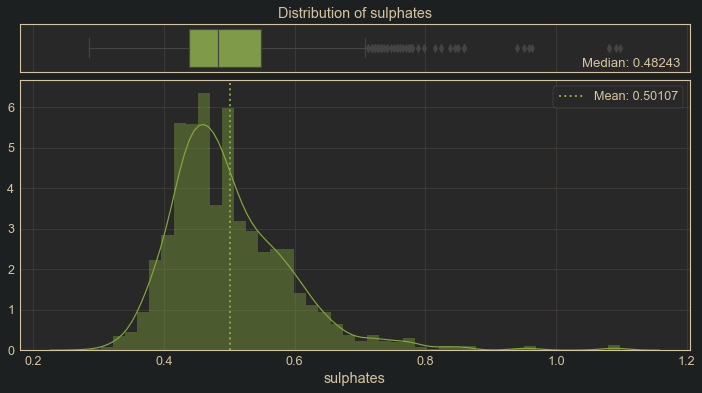

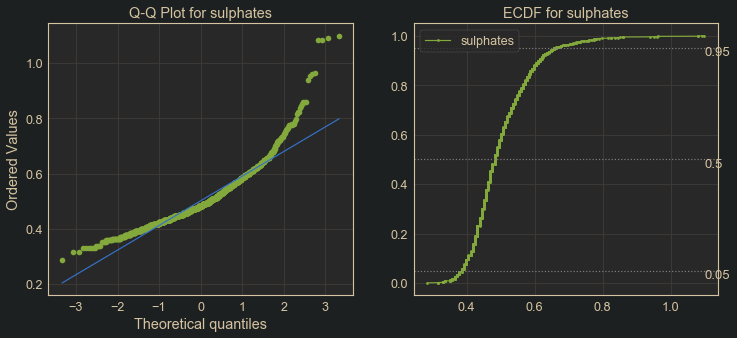

Variable: alcohol
Normality Test Results for ['alcohol']:
-------------------------------------------------------------------------------------------


K-S and Shapiro-Wilk: 
 
 
 
 
 K-S 
 Shapiro-Wilk 
 
 
 
 
 alcohol 
 Statistic 
 0.987478 
 9.450958e-01 
 
 
 p-value 
 0.000000 
 6.161828e-24 
 
 
 Anderson-Darling: 
 
 
 
 statistic 
 critical 
 
 
 
 
 alcohol 
 27.993136 
 0.785 
 
 
 Jarque-Bera: 
 
 
 
 alcohol 
 
 
 
 
 Statistic 
 1.265915e+02 
 
 
 p-value 
 3.243455e-28 
 
 
 Skew 
 6.771620e-01 
 
 
 Kurtosis 
 2.743355e+00

count    1599.000000
mean        2.431458
std         0.090434
min         2.240710
25%         2.351375
50%         2.415914
75%         2.493205
max         2.766319
Name: alcohol, dtype: float64

Skew: 0.6771619573013923
Kurtosis: -0.2566448532512524


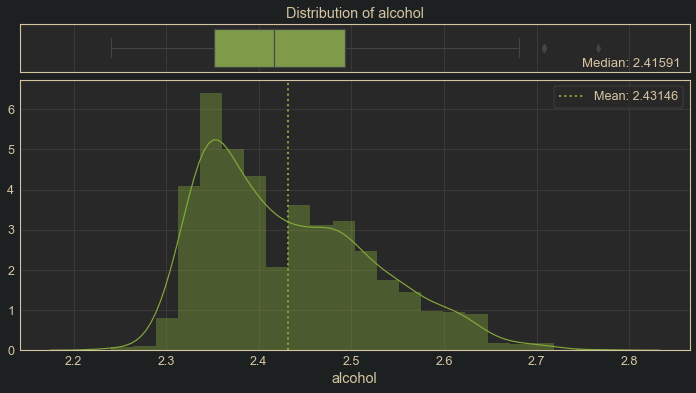

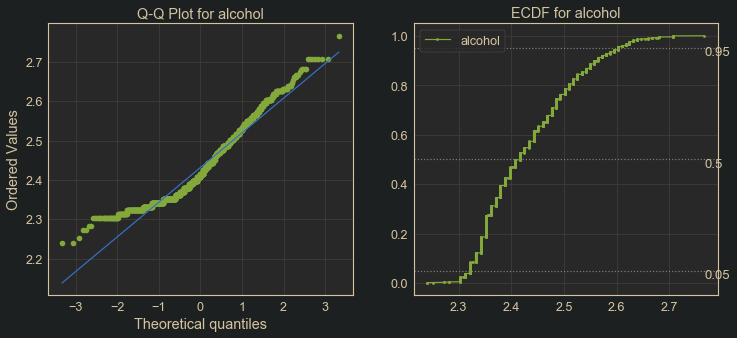

In [14]:
# I will make a log transformed version of the X data, for model comparison
# I'll add 1 to the whole dataframe to avoid complications with zero
X_log = np.log(X + 1)
mf.visualize_distribution(X_log, X_log.columns)

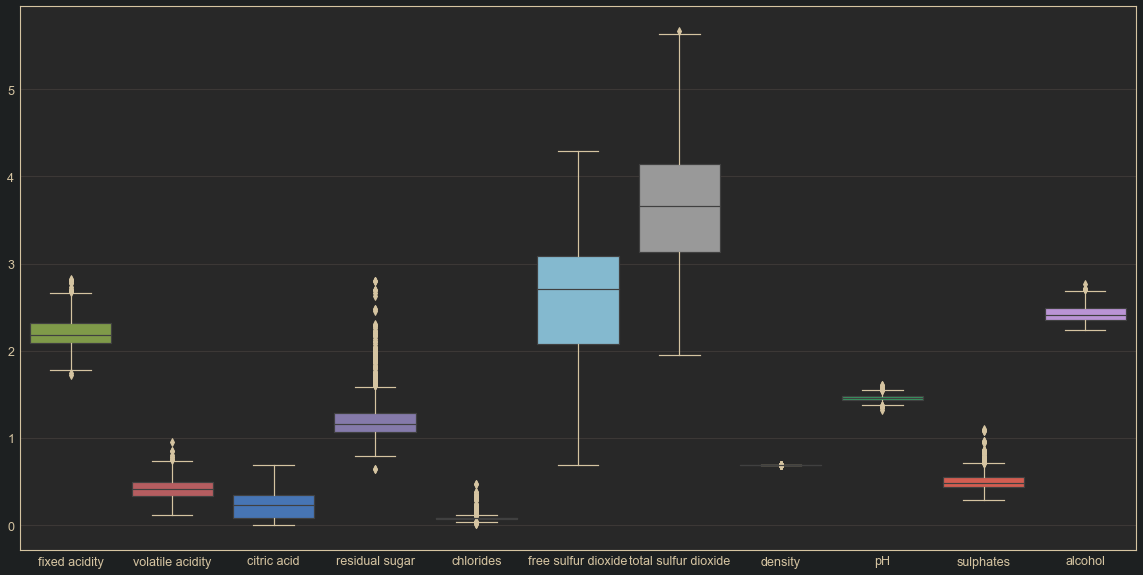

In [44]:
plt.figure(figsize=(20,10))
edgecolor = ('#d5c4a1')
sns.boxplot(data=X_log, whiskerprops={'color': edgecolor}, capprops={'color': edgecolor},
            flierprops={'markerfacecolor': edgecolor, 'markeredgecolor': edgecolor}
           );

In [15]:
# Let's try this again with scaled features, but after the train and test split
from sklearn.preprocessing import StandardScaler

### Training, testing, and cross-validation

First we want to do a train-test split to create a holdout set to evaluate how good our final model is. Remember that any time we make modeling decisions based on a section of our data, we risk overfitting to that data. We can make use of **_Cross Validation_** when using `GridSearchCV` to do model selection and hyperparameter tuning, then test our final model choice on the test set.

In the cell below:

* Create a training and test set using `train_test_split()` (set `random_state=42` for reproducability)

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [47]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = scaler.transform(X_test)

In [49]:
type(X_train_scaled)

pandas.core.frame.DataFrame

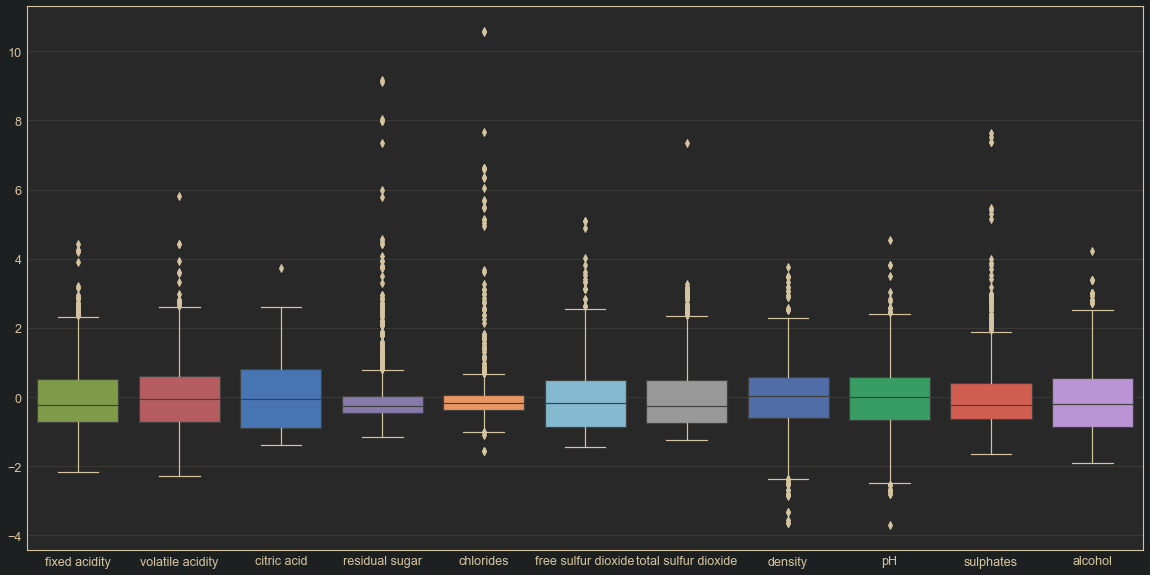

In [50]:
plt.figure(figsize=(20,10))
edgecolor = ('#d5c4a1')
sns.boxplot(data=X_train_scaled, whiskerprops={'color': edgecolor}, capprops={'color': edgecolor},
            flierprops={'markerfacecolor': edgecolor, 'markeredgecolor': edgecolor}
           );

### Create a baseline model: Decision Trees

In the cell below: 

* Instantiate a `DecisionTreeClassifier`   
* Perform a 3-fold cross-validation on the training data using this classifier 
* Calculate and print the mean cross-validation score from the model 

**_Note:_** If you need a refresher on how to use `cross_val_score()`, check out the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). 

In [84]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = dt_cv_score.mean()
#dt_cv_score_test = cross_val_score(dt_clf, X_test, y_test, cv=3)
#mean_dt_cv_score_test = np.mean(dt_cv_score_test)

print(f"Mean Train Cross Validation Score: {mean_dt_cv_score :.2%}")
#print(f"Mean Test Cross Validation Score: {mean_dt_cv_score_test :.2%}")

Mean Train Cross Validation Score: 56.21%


In [53]:
y_train.unique()

array([5, 7, 6, 4, 8, 3], dtype=int64)

Take a second to interpret the results of the cross-validation score.  How well did the model do? How does this compare to a naive baseline level of accuracy (random guessing)?

Write your answer below:

In [54]:
# Considering there are 6 target classes, a 55.63% accuracy is not that bad, since random
# guessing would give you a 1/6 or 16.67% accuracy

In [55]:
X_train_log, X_test_log, y_train, y_test = train_test_split(X_log, y, random_state=42)
# Let's compare this to the log transformed X features
dt_clf_log = DecisionTreeClassifier(random_state=42)
dt_cv_score = cross_val_score(dt_clf_log, X_train_log, y_train, cv=3)
mean_dt_cv_score = dt_cv_score.mean()

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 54.96%


In [56]:
# And on the scaled features
dt_clf_scaled = DecisionTreeClassifier(random_state=42)
dt_cv_score = cross_val_score(dt_clf_scaled, X_train_scaled, y_train, cv=3)
mean_dt_cv_score = dt_cv_score.mean()

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 55.30%


## Grid search: Decision trees

Our model does not have stellar performance. However, we've yet to modify the hyperparameters of the model. Each dataset is different, and the chances that the best possible parameters for a given dataset also happen to be the default parameters set by `scikit-learn` at instantiation is very low.  

This means that we need to try **_Hyperparameter Tuning_**.  There are several strategies for searching for optimal hyperparameters. The one we'll be using, **_Combinatoric Grid Searching_**, is probably the most popular because it performs an exhaustive search of all possible combinations.  

The sklearn module we'll be using to accomplish this is `GridSearchCV`, which can be found inside of `sklearn.model_selection`.

Take a minute to look at sklearn's user guide for [GridSearchCV](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) and then complete the following task.

In the cell below:

* Complete the `param_grid` dictionary. In this dictionary, each key represents a parameter we want to tune and each corresponding value is a list of every parameter value we'd like to check for that parameter 
* Normally, you would have to just try different values to search through for each parameter.  However, in order to limit the complexity of this lab, the parameters and values to search through have been provided for you.  You just need to turn them into key-value pairs inside the `param_grid` dictionary. Complete `param_grid` so that it tests the following values for each corresponding parameter:
    * For `"criterion"`, try values of `"gini"` and `"entropy"` 
    * For `"max_depth"`, try `None`, as well as 2, 3, 4, 5, and 6  
    * For `min_samples_split`, try 2, 5, and 10 
    * For `"min_samples_leaf"`, try 1, 2, 3, 4, 5, and 6
    
* Before you run the grid search take some time to understand what each of the specific hyperparameters mean. How does varying the values of each hyperparameter effect the overfitting or underfitting of a decision tree model?

In [62]:
dt_param_grid = {
    'criterion':['gini', 'entropy'],
    'max_depth':[None,2,3,4,5,6],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,3,4,5,6]
}

Now that we have our parameter grid set up, we can use `GridSearchCV`.  Before we do, let's briefly think about the particulars of this model. 

Grid Search works by training a model on the data for each unique combination of parameters and then returning the parameters of the model that performed best. In order to protect us from randomness, it is common to implement K-Fold cross-validation during this step.  For this lab, we'll set K = 3, meaning that we'll actually train 3 different models for each unique combination of parameters.  

Given our `param_grid` and the knowledge that we're going to use 3-fold cross-validation, how many different decision trees will `GridSearchCV` have to train in order to try every possible combination and find the best parameter choices?

Calculate and print your answer in the cell below.

In [64]:
num_decision_trees = 2*6*3*6*3
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


That's a lot of decision trees! Decision trees are generally pretty quick to train, but that isn't the case with every type of model we want to tune. Be aware that if you set a particularly large search space of parameters inside your parameter grid, then grid search could potentially take a very long time. 

Let's create our `GridSearchCV` object and fit it. In the cell below: 

* Instantiate `GridSearchCV`.  Pass in our model, the parameter grid, and `cv=3` to use 3-fold cross-validation. Also set `return_train_score` to `True` 
* Call our grid search object's `fit()` method and pass in our data and labels, just as if you were using regular cross validation  

In [85]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, param_grid=dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

### Examine the best parameters

Now that we have fit our model using grid search, we need to inspect it to discover the optimal combination of parameters.

In the cell below:

* Calculate the the mean training score.  An array of training score results can be found inside the `.cv_results_` dictionary, with the key `mean_train_score` 
* Calculate the testing score using the our grid search model's `.score()` method by passing in our data and labels  
* Examine the appropriate attribute to discover the best estimator parameters found during the grid search  

**_HINT:_** If you're unsure what attribute this is stored in, take a look at sklearn's [GridSearchCV documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [86]:
# Mean training score
dt_gs_training_score = dt_grid_search.cv_results_['mean_train_score'].mean()

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 67.58%
Mean Test Score: 54.00%
Best Parameter Combination Found During Grid Search:


{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 5}

In [87]:
dt_grid_search.best_score_

0.5754908103592314

**_Question:_** What effect, if any, did our parameter tuning have on model performance? Will `GridSearchCV` always discover a perfectly (global) optimal set of parameters? Why or why not?

In [ ]:
# The parameter tuning has improved our training and test accuracy scores, although they are
# not much closer together than they were before. 
# The grid search is not guaranteed to provide the perfect global optimal set of parameters
# because it only creates combinations of the parameters that are provided to it, meaning that
# it can only be as good as the parameters that the user suggests.

### Tuning more advanced models: Random forests

Now that we have some experience with grid searching through parameter values for a decision tree classifier, let's try our luck with a more advanced model and tune a _random forest classifier_.  

In the cell below:
* Instantiate a `RandomForestClassifier` 
* Use 3-fold cross-validation to generate a baseline score for this model type, so that we have something to compare our tuned model performance to 

In [81]:
rf_clf = RandomForestClassifier()
#rf_clf.fit(X_train, y_train)
mean_rf_cv_score = cross_val_score(rf_clf, X_train, y_train, cv=3).mean()
#mean_rf_cv_score_test = cross_val_score(rf_clf, X_test, y_test, cv=3).mean()

print(f"Mean Train Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")
#print(f"Mean Test Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score_test :.2%}")

Mean Train Cross Validation Score for Random Forest Classifier: 65.81%


Now that we have our baseline score, we'll create a parameter grid specific to our random forest classifier.  

Again -- in a real world situation, you will need to decide what parameters to tune, and be very thoughtful about what values to test for each parameter.  However, since this is a lab, we have provided the following table in the interest of simplicity.  Complete the `rf_param_grid` dictionary with the following key-value pairs:
 
 
 |     Parameter     |         Values         |
|:-----------------:|:----------------------:|
|    n_estimators   |      [10, 30, 100]     |
|     criterion     |   ['gini', 'entropy']  |
|     max_depth     | [None, 2, 6, 10] |
| min_samples_split |       [5, 10]       |
|  min_samples_leaf |   [3, 6]   |

In [82]:
rf_param_grid = {
    'n_estimators': [10,30,100],
    'criterion': ['gini','entropy'],
    'max_depth': [None,2,6,10],
    'min_samples_split': [5,10],
    'min_samples_leaf': [3,6]
}

Great! Now that we have our parameter grid, we can grid search through it with our random forest. 

In the cell below, follow the process we used with decision trees above to grid search for the best parameters for our random forest classifier.  

Instantiate `GridSearchCV` and pass in:
* our random forest classifier
* the parameter grid 
* `cv=3` 
* **_do not_** specify `return_train_score` as we did with our decision trees example above.  In the interest of runtime, we'll only worry about testing accuracy this time  


**_NOTE:_** The runtime for the following cell can be over a minute on most computers.  

In [83]:
#rf_clf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf_clf, param_grid=rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Testing Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Testing Accuracy: 64.64%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


### Interpret results 

Did tuning the hyperparameters of our random forest classifier improve model performance? Is this performance increase significant? Which model did better? If you had to choose, which model would you put into production? Explain your answer.

In [89]:
X_train.shape

(1199, 11)

In [ ]:
# The performance actually decreased slightly after the grid search, which is strange
# The random forest has performed better than the single decision tree.
# Generally, the forest with tuned parameters will be better on unseen data, since it avoids 
# overfitting. I would probably put some more time into tuning the
# forest parameters, especially with the feature selection, and then see which has performed
# better on the holdout set before making a decision about which to deploy into production.
# In any case, the forest would be the better production choice than the single tree.

## Which model performed the best on the holdout set? 

Run the following cell to see the accuracy of the various grid search models on the test set: 

In [88]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.54
Random forest grid search:  0.6575


So our random forest model performed the best! 

## Summary

In this lab, you learned to:

* iteratively search for optimal model parameters using `GridSearhCV`
* tune model parameters for decision trees and random forests models 